2019/10/23 Jennifer Them
# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy
import sklearn.neighbors
import umap
import seaborn as sns
import hdbscan

In [2]:
import os
import sys

In [72]:
# trying to import spyder functions into jupyter notebook
#module_path = os.path.abspath(os.path.join('..'))
module_path = '/Users/jenniferthem/Masterthesis'
if module_path not in sys.path:
   sys.path.append(module_path)
from core.functions import *
#from core.simulation import *

In [73]:
module_path

'/Users/jenniferthem/Masterthesis'

In [74]:
Draw_hdbscan.draw_hdbscan(fc_matrix, 5, 10, 'leaf', component)

NameError: name 'Draw_hdbscan' is not defined

### loading csv file 

In [3]:
# loading csv file of z-mean FC data
dat_path = '/Users/jenniferthem/z_mean_corr_mat_ses-baseline_combined.csv'
labels_path_pfc = '/Users/jenniferthem/Masterthesis/core/data/PFC_vec.csv'
labels_path_str = '/Users/jenniferthem/Masterthesis/core/data/STR_ROI_vec.csv'
data = pd.read_csv(dat_path, engine='c', header = None)
labels = pd.read_csv(labels_path_pfc, engine='c', header =None)
#data = pd.read_csv(dat_path, engine='c').astype('float32') 
labels_str = pd.read_csv(labels_path_str, engine='c', header=None)

In [4]:
labels

0   1
0     OFC1 NaN
1     OFC1 NaN
2     OFC1 NaN
3     OFC1 NaN
4     OFC1 NaN
...    ...  ..
8933    33 NaN
8934    33 NaN
8935    33 NaN
8936    33 NaN
8937    33 NaN

[8938 rows x 2 columns]

In [5]:
# selecting only first column
labels_pfc = labels.iloc[:,0]
labels_pfc

0       OFC1
1       OFC1
2       OFC1
3       OFC1
4       OFC1
        ... 
8933      33
8934      33
8935      33
8936      33
8937      33
Name: 0, Length: 8938, dtype: object

In [6]:
labels_str

0
0     Putamen
1     Putamen
2     Putamen
3     Putamen
4     Putamen
...       ...
2936  Caudate
2937  Caudate
2938  Caudate
2939  Caudate
2940  Caudate

[2941 rows x 1 columns]

In [7]:
labels_pfc

0       OFC1
1       OFC1
2       OFC1
3       OFC1
4       OFC1
        ... 
8933      33
8934      33
8935      33
8936      33
8937      33
Name: 0, Length: 8938, dtype: object

In [8]:
# creating concatenated labels
roi_labels = pd.concat([labels_pfc, labels_str], axis=0, ignore_index=True, sort=False)
roi_labels.columns = ['label']
# saving labels in pickle structure
roi_labels.to_pickle('/Users/jenniferthem/Masterthesis/core/data/roi_labels.pkl')

In [9]:
roi_labels_arr = pd.DataFrame(roi_labels).to_numpy()
#roi_labels.to_numpy()
roi_labels_arr

array([['OFC1'],
       ['OFC1'],
       ['OFC1'],
       ...,
       ['Caudate'],
       ['Caudate'],
       ['Caudate']], dtype=object)

In [10]:
# transforming pandasFrame to numpy array
fc_data = pd.DataFrame(data).to_numpy()

In [11]:
fc_transposed = fc_data.transpose()

## Creating symmetric data matrix 
Output is fc_matrix as final n x n symmetric matrix

In [12]:
# setting values of FC: PFC-PFC and striatum-striatum to 0 for activity being random to each other
# size of PFC of zeros
add_pfc = np.zeros((8938,8938))
# size of striatum of zeros
add_str = np.zeros((2941,2941))
# transposed original data matrix
add_tra  = fc_data.transpose()

In [13]:
# lower side: concatenating the transposed data matrix + striatum-striatum
add_st = np.concatenate((add_tra, add_str), axis =1)
# upper side: concatenating the PFC-PFC + FC data
conc_data = np.concatenate((add_pfc, fc_data), axis =1)
# concatenated complete matrix 
fc_matrix = np.concatenate((conc_data, add_st), axis =0)

In [14]:
fc_matrix.shape

(11879, 11879)

In [15]:
fc_matrix

array([[ 0.       ,  0.       ,  0.       , ...,  0.0047785,  0.012771 ,
         0.0031577],
       [ 0.       ,  0.       ,  0.       , ...,  0.023449 ,  0.0038264,
        -0.0061228],
       [ 0.       ,  0.       ,  0.       , ..., -0.0083904,  0.0031221,
         0.0090002],
       ...,
       [ 0.0047785,  0.023449 , -0.0083904, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.012771 ,  0.0038264,  0.0031221, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.0031577, -0.0061228,  0.0090002, ...,  0.       ,  0.       ,
         0.       ]])

In [16]:
transposed_fc_matrix = fc_matrix.transpose()
transposed_fc_matrix

array([[ 0.       ,  0.       ,  0.       , ...,  0.0047785,  0.012771 ,
         0.0031577],
       [ 0.       ,  0.       ,  0.       , ...,  0.023449 ,  0.0038264,
        -0.0061228],
       [ 0.       ,  0.       ,  0.       , ..., -0.0083904,  0.0031221,
         0.0090002],
       ...,
       [ 0.0047785,  0.023449 , -0.0083904, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.012771 ,  0.0038264,  0.0031221, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.0031577, -0.0061228,  0.0090002, ...,  0.       ,  0.       ,
         0.       ]])

## UMAP
Input is fc_matrix

### Precomputed matrix: FC matrix as metric
- changing neighbors
- changing components
- changing min_dist

Neighbors = 50

In [17]:
neighbor50_precomputed = umap.UMAP(
        n_neighbors=50,
        n_components=2,
        min_dist=0.0,
        metric='precomputed'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


Trying out labeling

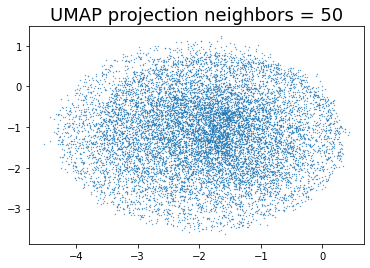

In [18]:
plt.scatter(neighbor50_precomputed[:, 0], neighbor50_precomputed[:, 1],
            s=0.1, cmap='Spectral', label=roi_labels);
plt.title('UMAP projection neighbors = 50', fontsize=18);

In [19]:
neighbor50_precomputed.shape

(11879, 2)

Neighbors = 100

In [20]:
neighbor100 = umap.UMAP(
        n_neighbors=100,
        n_components=2,
        min_dist=0.0,
        metric='precomputed'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


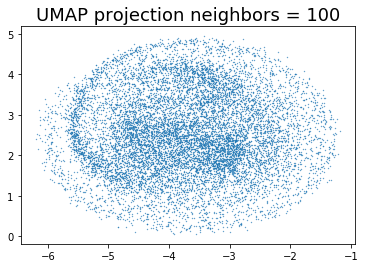

In [103]:
plt.scatter(neighbor100[:, 0], neighbor100[:, 1],
            s=0.1, cmap='Spectral');
plt.title('UMAP projection neighbors = 100', fontsize=18);

Neighbors = 200

In [9]:
neighbor200_precomputed = umap.UMAP(
        n_neighbors=200,
        n_components=2,
        min_dist=0.0,
        metric='precomputed'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


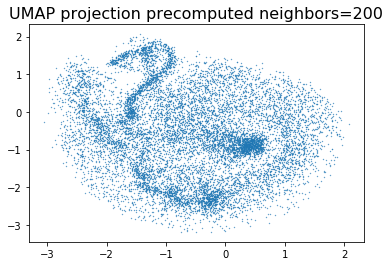

In [10]:
plt.scatter(neighbor200_precomputed[:, 0], neighbor200_precomputed[:, 1],
            s=0.1, cmap='Spectral');
plt.title('UMAP projection precomputed neighbors=200', fontsize=16);

In [187]:
np.save('/Users/jenniferthem/Masterthesis/core/data/UMAP_precomputed', neighbor200_precomputed)
neighbor200_precomputed_df = pd.DataFrame(neighbor200_precomputed, columns = ['x', 'y'])
neighbor200_precomputed_df.to_pickle('/Users/jenniferthem/Masterthesis/core/data/UMAP_precomputed_df.pkl')

Labeling of plot with ROI labels

In [139]:
# Combining the UMAP data with the ROI labels of each voxel
labeled_data = pd.concat([neighbor200_precomputed_df, roi_labels], axis=1)
labeled_data
labeled_data.to_pickle('/Users/jenniferthem/Masterthesis/core/data/UMAP_precomputed_labeled.pkl')

<IPython.core.display.Javascript object>


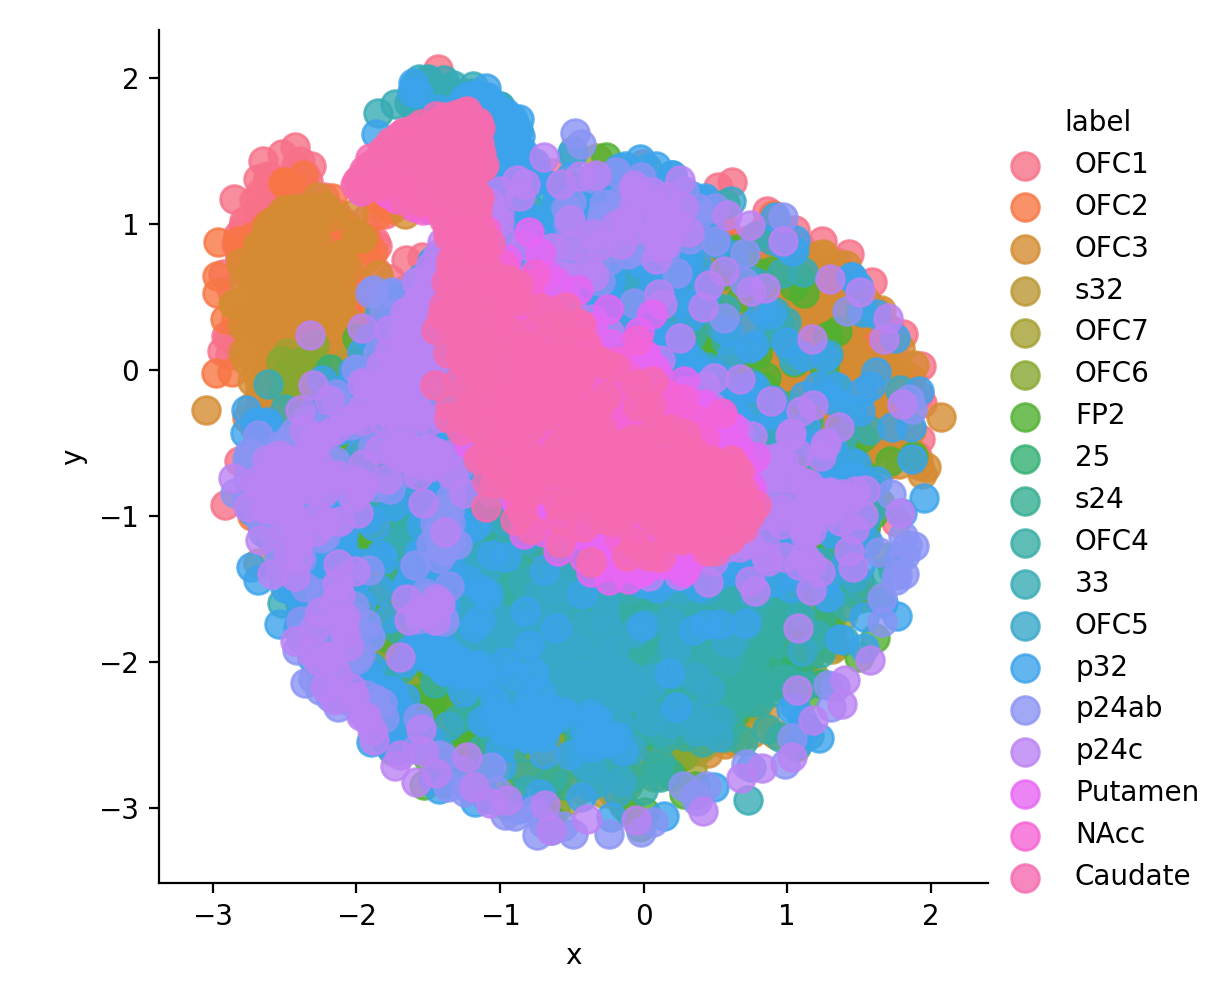

In [180]:
%matplotlib notebook

facet = sns.lmplot(data=labeled_data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, scatter_kws={"s": 100})

<IPython.core.display.Javascript object>


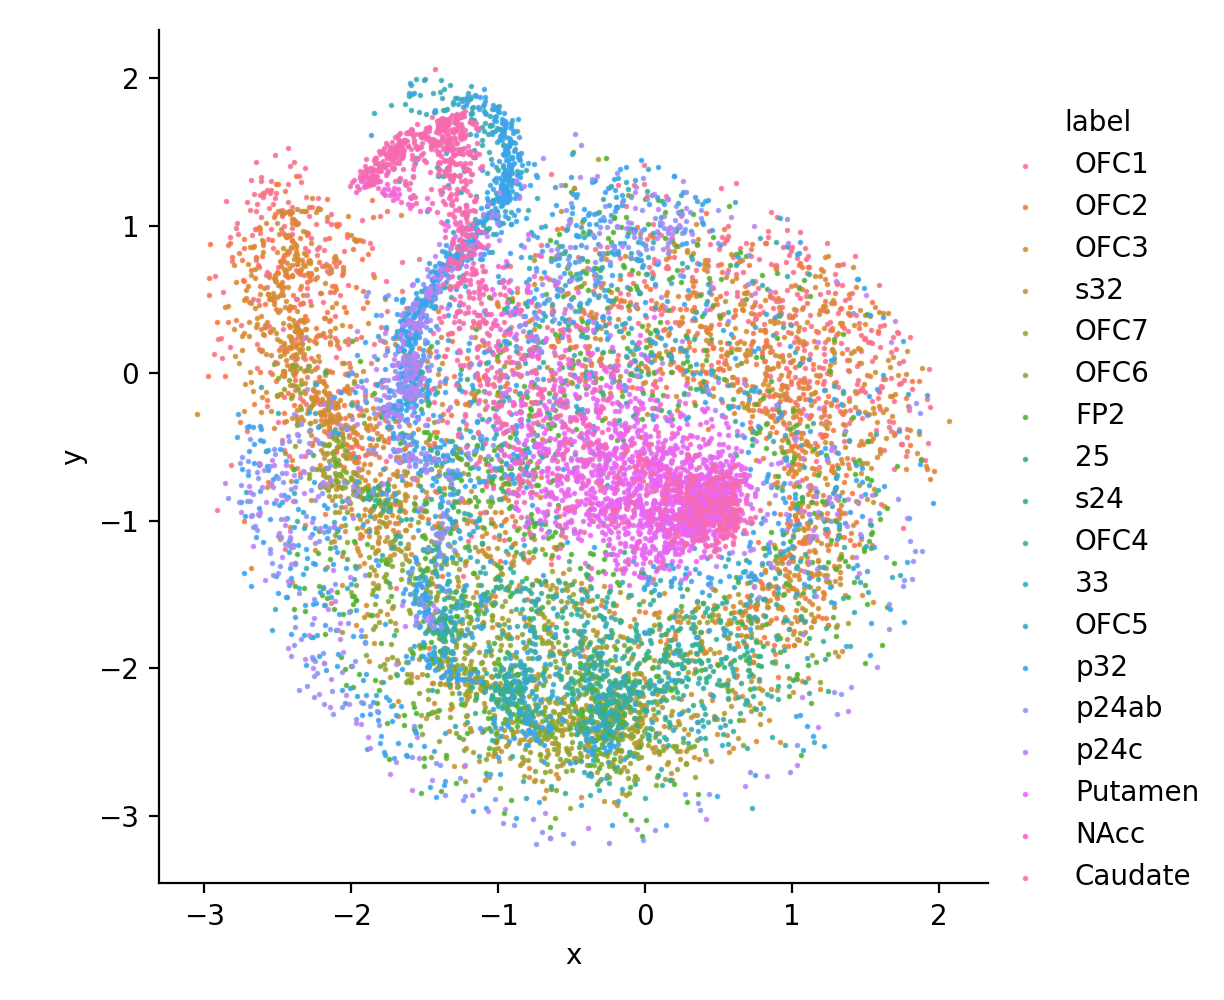

In [145]:
%matplotlib notebook
facet = sns.lmplot(data=labeled_data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, scatter_kws={"s": 1})

<IPython.core.display.Javascript object>


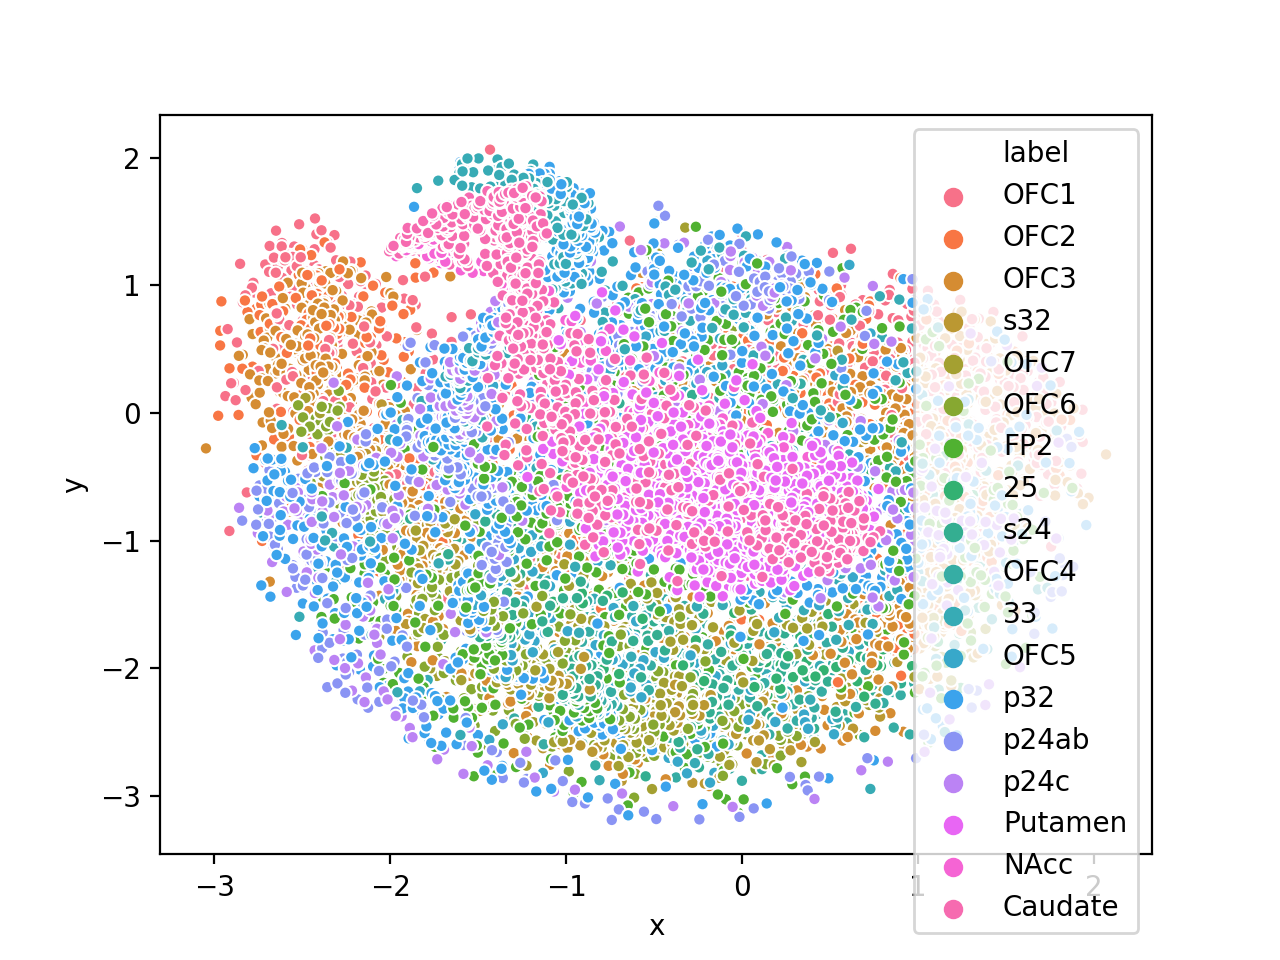

In [144]:
%matplotlib notebook
sp = sns.scatterplot(x="x", y="y", hue='label', data=labeled_data, s=20)

Changing distances

In [155]:
neighbor200_precomputed_dist02 = umap.UMAP(
        n_neighbors=200,
        n_components=2,
        min_dist=0.2,
        metric='precomputed'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


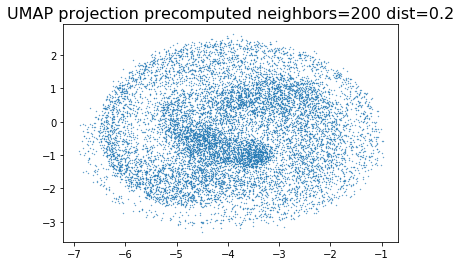

In [156]:
plt.scatter(neighbor200_precomputed_dist02[:, 0], neighbor200_precomputed_dist02[:, 1],
            s=0.1, cmap='Spectral');
plt.title('UMAP projection precomputed neighbors=200 dist=0.2', fontsize=16);

In [157]:
neighbor200_precomputed_dist05 = umap.UMAP(
        n_neighbors=200,
        n_components=2,
        min_dist=0.5,
        metric='precomputed'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


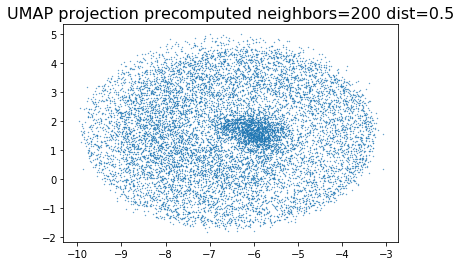

In [158]:
plt.scatter(neighbor200_precomputed_dist05[:, 0], neighbor200_precomputed_dist05[:, 1],
            s=0.1, cmap='Spectral');
plt.title('UMAP projection precomputed neighbors=200 dist=0.5', fontsize=16);

### 3 components

In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
neighbor50_precomputed_n3 = umap.UMAP(
        n_neighbors=50,
        n_components=3,
        min_dist=0.2,
        metric='precomputed'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


Text(0.5, 0.92, 'Precomputed Neighbors=50 dist=0.2')

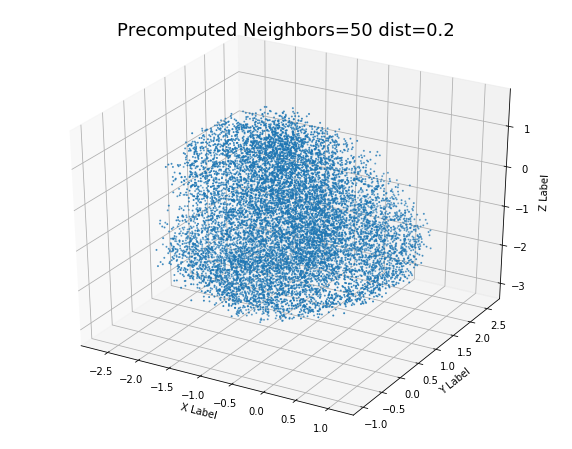

In [41]:
fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(neighbor50_precomputed_n3[:,0], neighbor50_precomputed_n3[:,1], neighbor50_precomputed_n3[:,2], s=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Precomputed Neighbors=50 dist=0.2', fontsize=18)

In [17]:
neighbor150_precomputed_n3 = umap.UMAP(
        n_neighbors=150,
        n_components=3,
        min_dist=0.2,
        metric='precomputed'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


Text(0.5, 0.92, 'Precomputed Neighbors=150 dist=0.2')

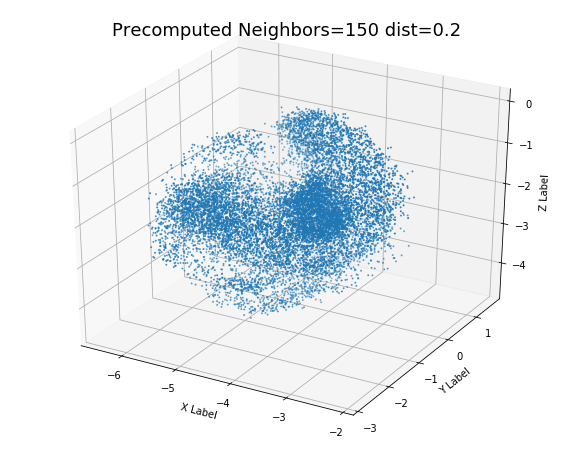

In [40]:
fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(neighbor150_precomputed_n3[:,0], neighbor150_precomputed_n3[:,1], neighbor150_precomputed_n3[:,2], s=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Precomputed Neighbors=150 dist=0.2', fontsize=18)

In [23]:
neighbor200_precomputed_n3 = umap.UMAP(
        n_neighbors=200,
        n_components=3,
        min_dist=0.0,
        metric='precomputed'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


Text(0.5, 0.92, 'Precomputed Neighbors=200 3N dist=0.0')

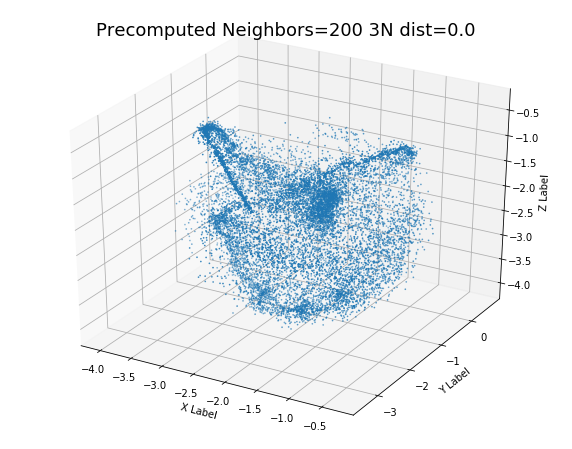

In [45]:
fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(neighbor200_precomputed_n3[:,0], neighbor200_precomputed_n3[:,1], neighbor200_precomputed_n3[:,2], s=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Precomputed Neighbors=200 3N dist=0.0', fontsize=18)

In [25]:
neighbor200_precomputed_n3_dist02 = umap.UMAP(
        n_neighbors=200,
        n_components=3,
        min_dist=0.2,
        metric='precomputed'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


Text(0.5, 0.92, 'Precomputed Neighbors=200 3N dist=0.2')

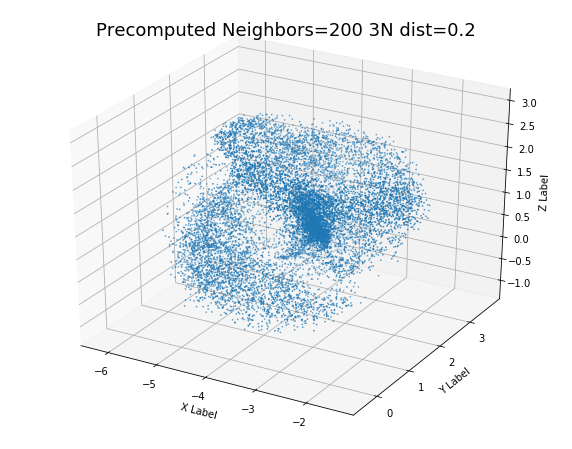

In [44]:
fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(neighbor200_precomputed_n3_dist02[:,0], neighbor200_precomputed_n3_dist02[:,1], neighbor200_precomputed_n3_dist02[:,2], s=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Precomputed Neighbors=200 3N dist=0.2', fontsize=18)

In [153]:
neighbor200_precomputed_n3_dist05 = umap.UMAP(
        n_neighbors=200,
        n_components=3,
        min_dist=0.5,
        metric='precomputed'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


Text(0.5, 0.92, 'Precomputed Neighbors=200 3N dist=0.5')

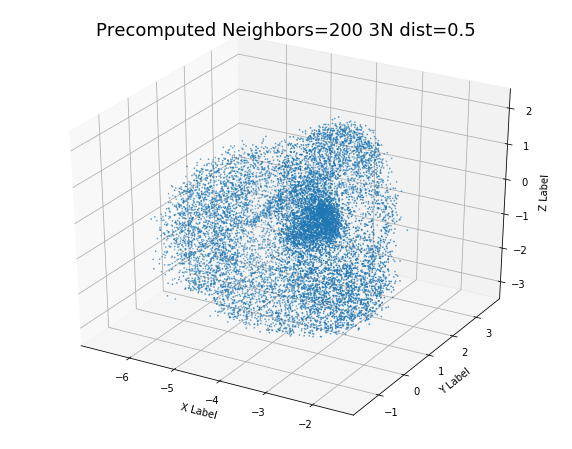

In [154]:
fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(neighbor200_precomputed_n3_dist05[:,0], neighbor200_precomputed_n3_dist05[:,1], neighbor200_precomputed_n3_dist05[:,2], s=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Precomputed Neighbors=200 3N dist=0.5', fontsize=18)

### Euclidean metric

Neighbors = 50

In [18]:
neighbor50_euclidean = umap.UMAP(
        n_neighbors=50,
        n_components=2,
        min_dist=0.0,
        metric='euclidean'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../anaconda3/envs/py37/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../anaconda3/envs/py37/l

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not [["'FO1'"]
 ["'FO1'"]
 ["'FO1'"]
 ...
 ["'33'"]
 ["'33'"]
 ["'33'"]].

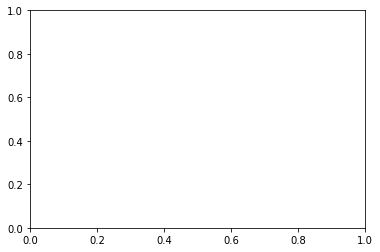

In [21]:
plt.scatter(neighbor50_euclidean[:, 0], neighbor50_euclidean[:, 1],
            s=0.1, c = pfc_labels, cmap='Spectral');
plt.title('UMAP projection neighbors = 50', fontsize=18);

Neighbors = 100

In [112]:
neighbor100_euclidean = umap.UMAP(
        n_neighbors=100,
        n_components=2,
        min_dist=0.0,
        metric='euclidean'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


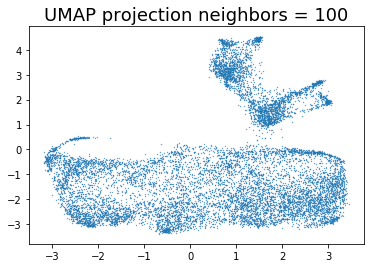

In [113]:
plt.scatter(neighbor100_euclidean[:, 0], neighbor100_euclidean[:, 1],
            s=0.1, cmap='Spectral');
plt.title('UMAP projection neighbors = 100', fontsize=18);

Neighbors = 200

In [21]:
# trying out euclidean distance as similarity measure
neighbor200_euclidean = umap.UMAP(
        n_neighbors=200,
        n_components=2,
        min_dist=0.0,
        metric='euclidean'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/py37/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3

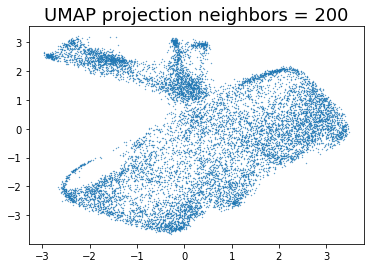

In [22]:
# rearranged data
plt.scatter(neighbor200_euclidean[:, 0], neighbor200_euclidean[:, 1],
            s=0.1, cmap='Spectral');
plt.title('UMAP projection neighbors = 200', fontsize=18);

In [27]:
np.save('/Users/jenniferthem/Masterthesis/core/data/UMAP_euclidean', neighbor200_euclidean)
neighbor200_euclidean_df = pd.DataFrame(neighbor200_euclidean,  columns = ['x', 'y'])
neighbor200_euclidean_df.to_pickle('/Users/jenniferthem/Masterthesis/core/data/UMAP_euclidean_df.pkl')

In [28]:
labeled_data_euclidean = pd.concat([neighbor200_euclidean_df, roi_labels], axis=1)
labeled_data_euclidean.to_pickle('/Users/jenniferthem/Masterthesis/core/data/UMAP_euclidean_labeled.pkl')

In [153]:
labeled_data_euclidean

x         y    label
0     -0.229449  0.951559     OFC1
1     -0.273205  0.806283     OFC1
2     -0.074742  1.674022     OFC1
3      0.723802 -0.948693     OFC1
4     -0.381273  1.289165     OFC1
...         ...       ...      ...
11874 -0.620502  2.880172  Caudate
11875 -0.601949  2.879373  Caudate
11876 -0.592079  2.869920  Caudate
11877 -0.599197  2.851795  Caudate
11878 -0.576592  2.827781  Caudate

[11879 rows x 3 columns]

<IPython.core.display.Javascript object>


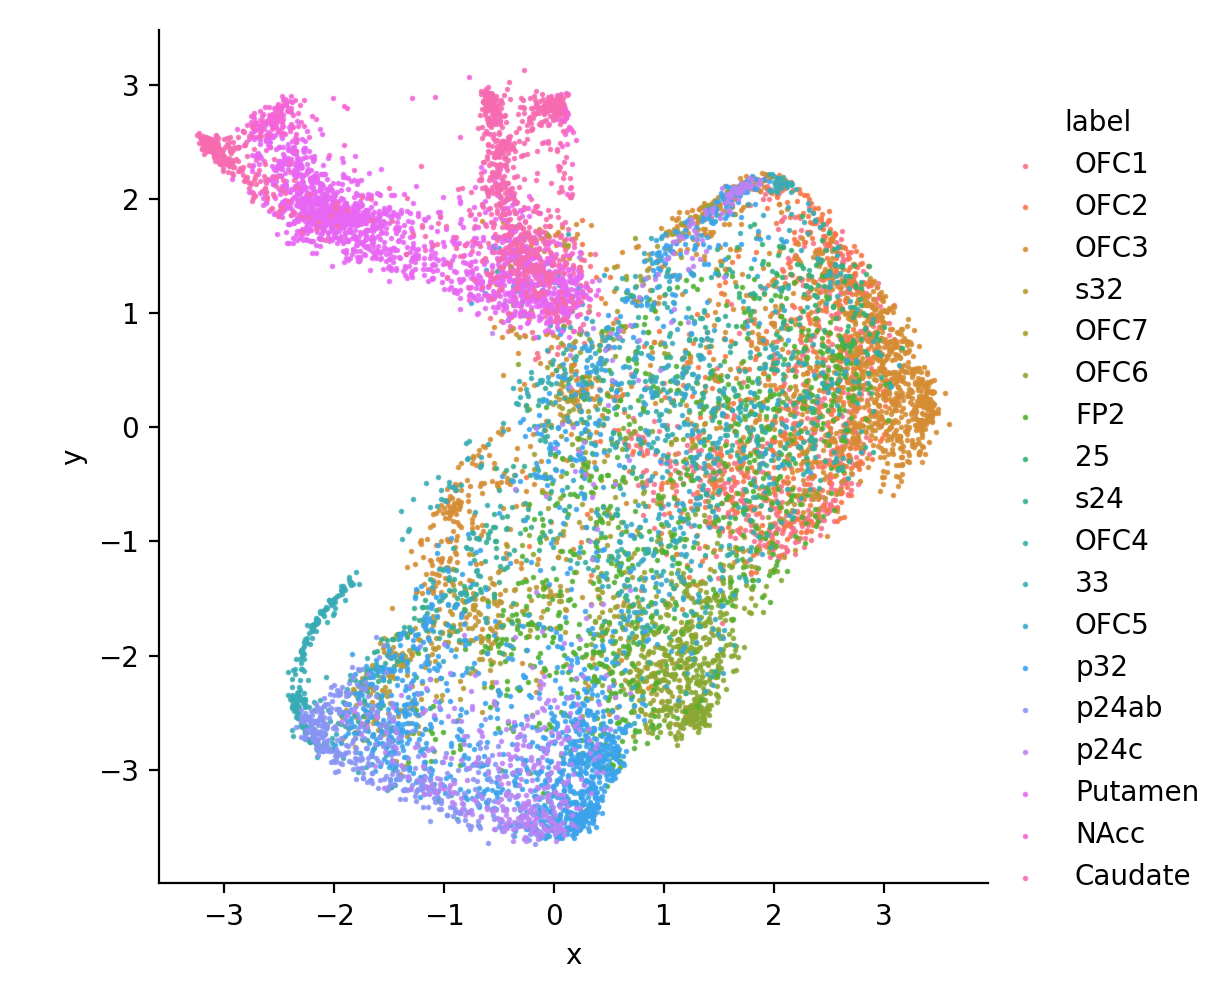

In [154]:
labeled_plot_euclidean = sns.lmplot(data=labeled_data_euclidean, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, scatter_kws={"s": 1})

### 3 components

In [19]:
neighbor150_euclidean_n3 = umap.UMAP(
        n_neighbors=150,
        n_components=3,
        min_dist=0.0,
        metric='euclidean'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "anaconda3/envs/py37/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "anaconda3/envs/py37/lib/pyt

Text(0.5, 0.92, 'Euclidean Neighbors=150 dist=0.0')

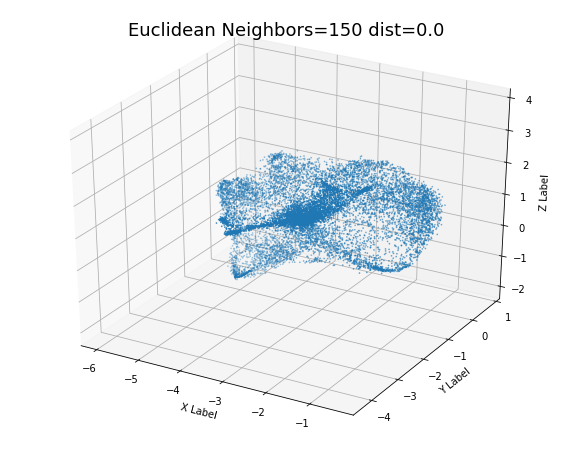

In [46]:
fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(neighbor150_euclidean_n3[:,0], neighbor150_euclidean_n3[:,1], neighbor150_euclidean_n3[:,2], s=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Euclidean Neighbors=150 dist=0.0', fontsize=18)

In [21]:
neighbor200_euclidean_n3 = umap.UMAP(
        n_neighbors=200,
        n_components=3,
        min_dist=0.0,
        metric='euclidean'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


Text(0.5, 0.92, 'Euclidean distance 200 neighbors dist=0.0')

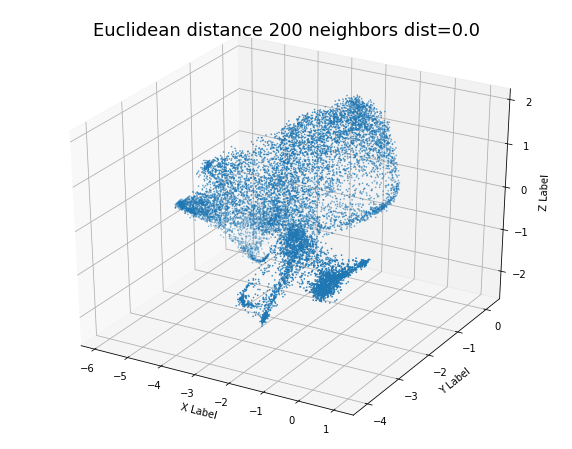

In [47]:
fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(neighbor200_euclidean_n3[:,0], neighbor200_euclidean_n3[:,1], neighbor200_euclidean_n3[:,2], s=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Euclidean distance 200 neighbors dist=0.0', fontsize=18)

In [30]:
neighbor200_euclidean_n3_dist02 = umap.UMAP(
        n_neighbors=200,
        n_components=3,
        min_dist=0.2,
        metric='euclidean'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


Text(0.5, 0.92, 'Euclidean distance 200 neighbors dist=0.2')

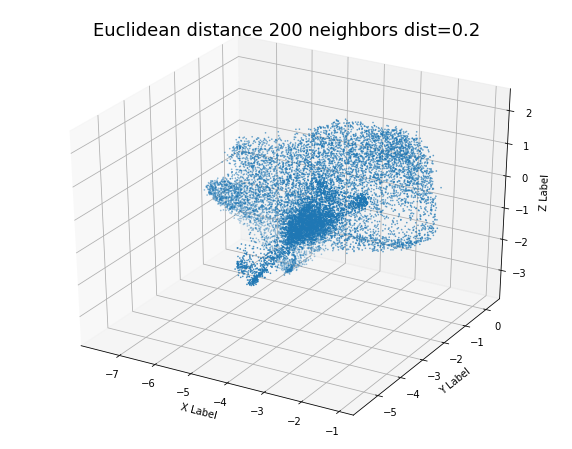

In [48]:
fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(neighbor200_euclidean_n3_dist02[:,0], neighbor200_euclidean_n3_dist02[:,1], neighbor200_euclidean_n3_dist02[:,2], s=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Euclidean distance 200 neighbors dist=0.2', fontsize=18)

## HDBSCAN clustering on the UMAP results

### Precomputed metric

Neighbors=100

In [55]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=200,
    cluster_selection_method='leaf'
).fit_predict(neighbor100)

In [58]:
labels

array([-1, -1, -1, ...,  0, -1,  5])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


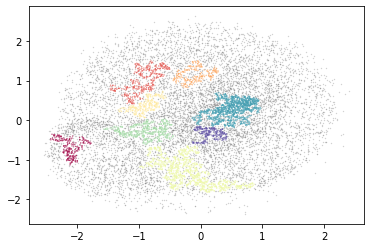

In [56]:
clustered = (labels >= 0)
plt.scatter(neighbor100[~clustered, 0],
            neighbor100[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(neighbor100[clustered, 0],
            neighbor100[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

In [59]:
clustered

array([False, False, False, ...,  True, False,  True])

In [57]:
# clusteres only 30.38% of points when min_cluster_size=100
# clusteres only 28.41% of points when min_cluster_size=200
np.sum(clustered) / neighbor100.shape[0]

0.3300782894183012

Neighbors = 200

In [191]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=200,
    cluster_selection_method='leaf'
).fit_predict(neighbor200_precomputed)
np.save('/Users/jenniferthem/Masterthesis/core/data/HDBScan_precomputed_labels', labels)

<IPython.core.display.Javascript object>


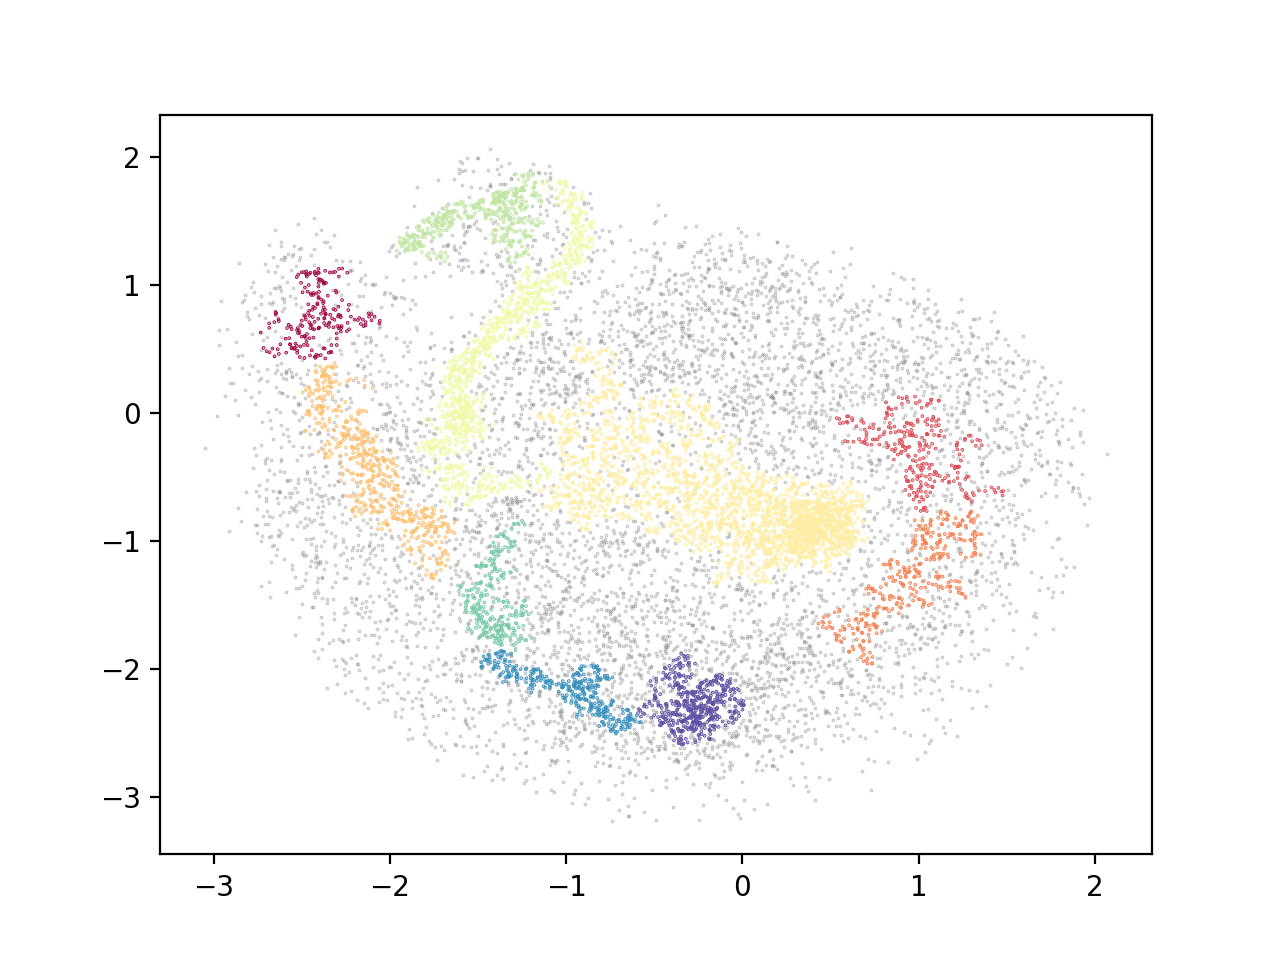

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [164]:
clustered = (labels >= 0)
plt.scatter(neighbor200_precomputed[~clustered, 0],
            neighbor200_precomputed[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(neighbor200_precomputed[clustered, 0],
            neighbor200_precomputed[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

In [174]:
labels_precomputed_df = pd.DataFrame(labels, columns = ['label'])
clustered_data_precomputed = pd.concat([neighbor200_precomputed_df, labels_precomputed_df], axis=1)

x         y  label
0     -2.477558  0.177693      3
1     -1.757514  0.419845     -1
2     -0.543714 -1.110150     -1
3     -2.854514  1.168409     -1
4      0.561835  0.999553     -1
...         ...       ...    ...
11874 -1.154328  1.658735      6
11875 -1.140663  1.658622      6
11876 -1.194211  1.700096      6
11877 -1.173898  1.688182      6
11878 -1.110674  1.406374     -1

[11879 rows x 3 columns]

In [190]:
labels_precomputed_df.to_pickle('/Users/jenniferthem/Masterthesis/core/data/HDBScan_labels_precomputed_df.pkl')
clustered_data_precomputed.to_pickle('/Users/jenniferthem/Masterthesis/core/data/HDBScan_labeled_data_precomputed.pkl')

Clustering with original cluster_selection method - creates bigger clusters

In [61]:
labels_og_clu = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=200
).fit_predict(neighbor200_precomputed)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


AttributeError: 'PathCollection' object has no property 'color_palette'

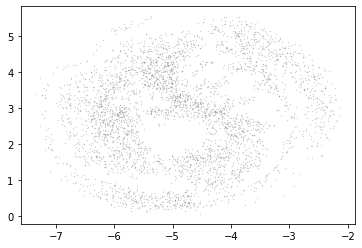

In [75]:
clustered_og_clu = (labels_og_clu >= 0)
plt.scatter(neighbor200_precomputed[~clustered_og_clu, 0],
            neighbor200_precomputed[~clustered_og_clu, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(neighbor200_precomputed[clustered_og_clu, 0],
            neighbor200_precomputed[clustered_og_clu, 1],
            c=labels_og_clu[clustered_og_clu],
            s=0.1,
            cmap='Spectral');

In [54]:
label_df = pd.DataFrame(clustered)
label_df

0
0      False
1      False
2      False
3      False
4      False
...      ...
11874   True
11875   True
11876  False
11877  False
11878   True

[11879 rows x 1 columns]

In [55]:
np.amax(labels)

9

ValueError: 'c' argument has 11879 elements, which is not acceptable for use with 'x' with size 7770, 'y' with size 7770.

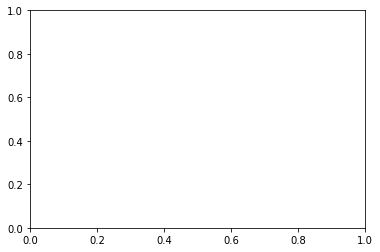

In [74]:
clusterer = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=200,
).fit(neighbor200_precomputed)

color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(neighbor200_precomputed[clustered_og_clu, 0],
            neighbor200_precomputed[clustered_og_clu, 1],
            s=0.1, linewidth=0, c=cluster_member_colors, alpha=0.25)


<IPython.core.display.Javascript object>


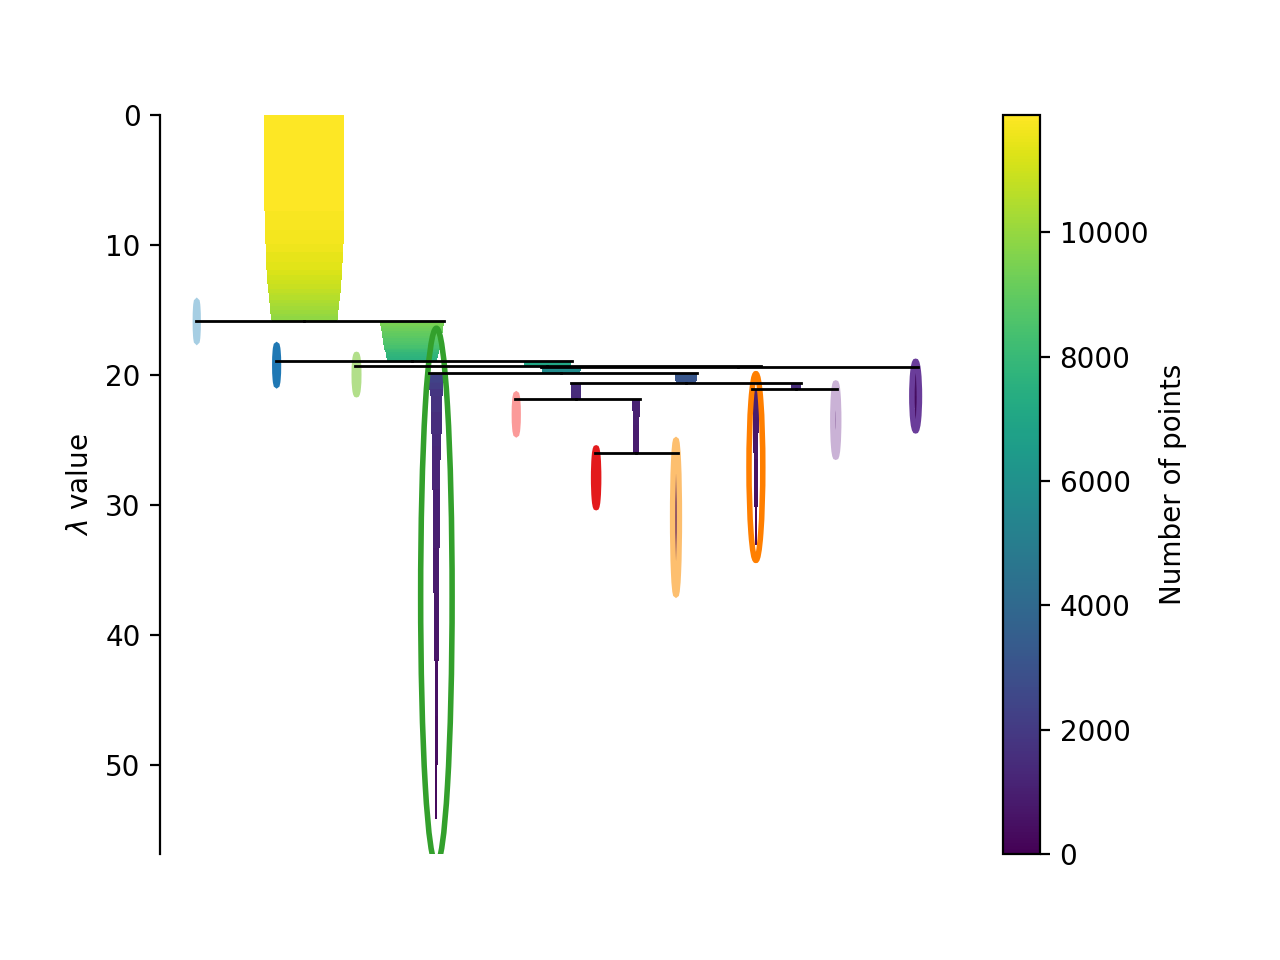

In [181]:
%matplotlib notebook

clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('Paired', 10))

<IPython.core.display.Javascript object>


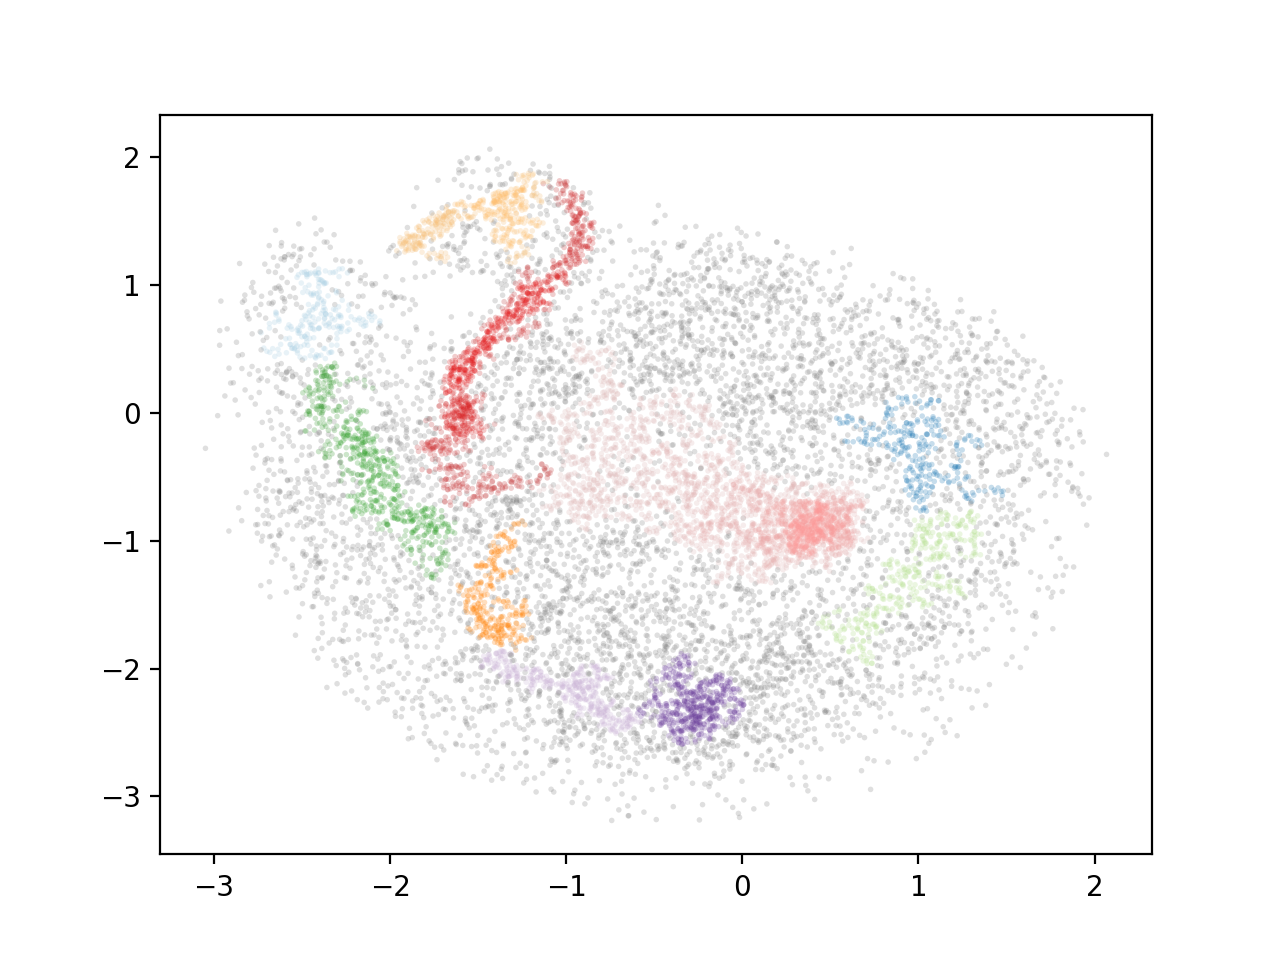

In [179]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=200, min_samples=5,cluster_selection_method='leaf').fit(neighbor200_precomputed)
color_palette = sns.color_palette('Paired', 10)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(neighbor200_precomputed[:,0], neighbor200_precomputed[:,1], s=4, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [14]:
# clusters 57.15% of points min_cluster_size=200
np.sum(clustered) / neighbor200_precomputed.shape[0]

0.5302634901927772

#### 3D

Clustering of precomputed matrix neighbors=200 dist=0.0

In [150]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=200,
    cluster_selection_method='leaf'
).fit_predict(neighbor200_precomputed_n3)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0.92, 'Precomputed 200 neighbors dist=0.0')

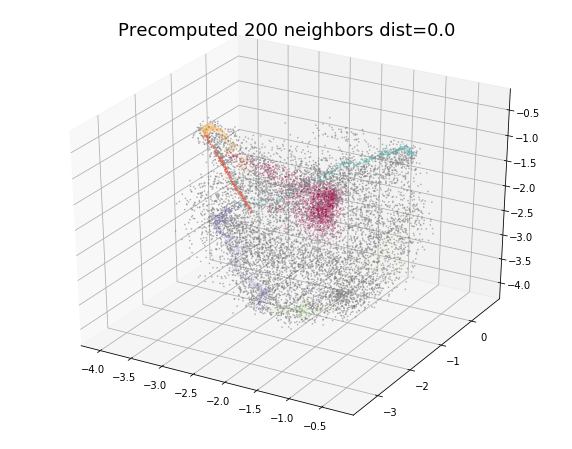

In [151]:
clustered = (labels >= 0)
fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(neighbor200_precomputed_n3[~clustered, 0], neighbor200_precomputed_n3[~clustered, 1], neighbor200_precomputed_n3[~clustered, 2],s=0.5, c=(0.5, 0.5, 0.5),alpha=0.5)

ax.scatter(neighbor200_precomputed_n3[clustered, 0],
           neighbor200_precomputed_n3[clustered, 1],
           neighbor200_precomputed_n3[clustered, 2],
           c=labels[clustered],
           s=0.1,
           cmap='Spectral')
plt.title('Precomputed 200 neighbors dist=0.0', fontsize=18)

In [152]:
# clusters 40.77% of points
np.sum(clustered) / neighbor200_precomputed_n3.shape[0]

0.40777843252799056

Clustering of precomputed matrix neighbors=200 dist=0.2

In [159]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=100,
    cluster_selection_method='leaf'
).fit_predict(neighbor200_precomputed_n3_dist02)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0.92, 'Precomputed 200 neighbors dist=0.2')

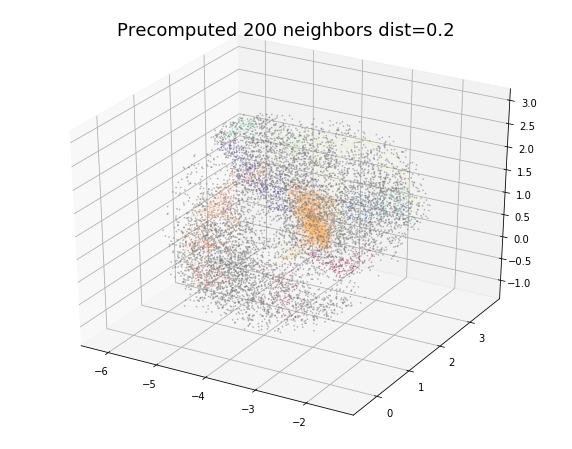

In [160]:
clustered = (labels >= 0)
fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(neighbor200_precomputed_n3_dist02[~clustered, 0], neighbor200_precomputed_n3_dist02[~clustered, 1], neighbor200_precomputed_n3_dist02[~clustered, 2],s=0.5, c=(0.5, 0.5, 0.5),alpha=0.5)

ax.scatter(neighbor200_precomputed_n3_dist02[clustered, 0],
           neighbor200_precomputed_n3_dist02[clustered, 1],
           neighbor200_precomputed_n3_dist02[clustered, 2],
           c=labels[clustered],
           s=0.1,
           cmap='Spectral')
plt.title('Precomputed 200 neighbors dist=0.2', fontsize=18)

In [161]:
# clusters 46.95% of points just as with dist=0.0
np.sum(clustered) / neighbor200_precomputed_n3_dist02.shape[0]

0.4426298509975587

### Euclidean metric

Neighbors = 200

In [41]:
# set clustering method to 'leaf' --> more fine grained clustering
labels_euclidean = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=200,
    cluster_selection_method='leaf'
).fit_predict(neighbor200_euclidean)
# save labels
np.save('/Users/jenniferthem/Masterthesis/core/data/HDBScan_euclidean_labels', labels_euclidean)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


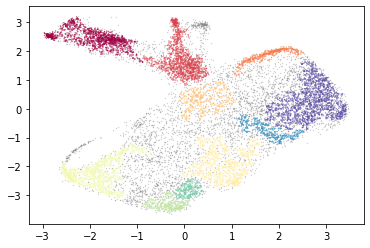

In [43]:
clustered = (labels_euclidean >= 0)
plt.scatter(neighbor200_euclidean[~clustered, 0],
            neighbor200_euclidean[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(neighbor200_euclidean[clustered, 0],
            neighbor200_euclidean[clustered, 1],
            c=labels_euclidean[clustered],
            s=0.1,
            cmap='Spectral');

In [53]:
# dataframe with labels from HDBScan
labels_euclidean_df = pd.DataFrame(labels_euclidean)
labels_euclidean_df.columns = ['label']
labels_euclidean_df.to_pickle('/Users/jenniferthem/Masterthesis/core/data/HDBScan_labels_euclidean_df.pkl')

In [55]:
clustered_data_euclidean = pd.concat([neighbor200_euclidean_df, labels_euclidean_df], axis=1)
clustered_data_euclidean.to_pickle('/Users/jenniferthem/Masterthesis/core/data/HDBScan_labeled_data_euclidean.pkl')

In [195]:
# clusteres 51.53% of points
np.sum(clustered) / neighbor200_euclidean.shape[0]

0.6481185284956646

#### 3D

In [139]:
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=200,
    cluster_selection_method='leaf'
).fit_predict(neighbor200_euclidean_n3)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0.92, 'Euclidean distance 200 neighbors')

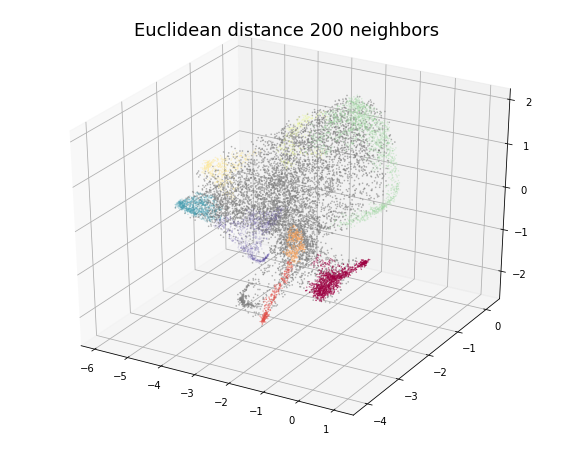

In [140]:
clustered = (labels >= 0)
fig = plt.figure(figsize = [10,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(neighbor200_euclidean_n3[~clustered, 0], neighbor200_euclidean_n3[~clustered, 1], neighbor200_euclidean_n3[~clustered, 2],s=0.5, c=(0.5, 0.5, 0.5),alpha=0.5)

ax.scatter(neighbor200_euclidean_n3[clustered, 0],
           neighbor200_euclidean_n3[clustered, 1],
           neighbor200_euclidean_n3[clustered, 2],
           c=labels[clustered],
           s=0.1,
           cmap='Spectral')
plt.title('Euclidean distance 200 neighbors', fontsize=18)

In [141]:
#clusters 49.14%
np.sum(clustered) / neighbor200_euclidean_n3.shape[0]

0.49145550972304064